![](https://i.imgur.com/BAhJSSl.jpg)

# Food Delivery Time Prediction

## Jaya Raghavendra | jay.raghav333@gmail.com | 7036563656

![](img.jpg)

#### When was the last time you ordered food online? And how long did it take to reach you?

### Description

- The entire world is transforming digitally and our relationship with technology has grown exponentially over the last few years. We have grown closer to technology, and it has made our life a lot easier by saving time and effort. Today everything is accessible with smartphones — from groceries to cooked food and from medicines to doctors. In this hackathon, we provide you with data that is a by-product as well as a thriving proof of this growing relationship. 

### 01 - Problem Statement
-  To predict Food Delivery Time based on the available data

## Datasets

- Size of training set: 11,094 records

- Size of test set: 2,774 record

# FEATURES:

| Feature Name | Description |
| ------- | ------- |
|Restaurant| A unique ID that represents a restaurant|
|Location| The location of the restaurant|
|Cuisines| The cuisines offered by the restaurant|
|Average_Cost| The average cost for one person/order|
|Minimum_Order|The minimum order amount|
|Rating| Customer rating for the restaurant|
|Votes| The total number of customer votes for the restaurant|
|Reviews| The number of customer reviews for the restaurant|
|Delivery_Time| The order delivery time of the restaurant (Target Classes) |

In [1]:
#importing required libraries
import warnings # To avoid deprecation erros in notebook
warnings.filterwarnings('ignore')
import re #For handling regular expressions
import numpy as np #for handling multi dimensional arrays of data
import pandas as pd #for handling structured data
import matplotlib.pyplot as plt # for 2D plotting
import seaborn as sns # for better visualizations
#to plot all graphs in the notebook
%matplotlib inline

In [2]:
# Loading data and storing the data in a variable for future modifications
df_train = pd.read_excel("Data_Train.xlsx")
df_to_predict = pd.read_excel("Data_Test.xlsx")

In [3]:
#read train data

df_train.head().style.set_table_styles([{'selector': 'tr:hover','props': [('background-color', 'yellow')]}])

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [4]:
#read test data

df_to_predict.head().style.set_table_styles([{'selector': 'tr:hover','props': [('background-color', 'yellow')]}])

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, South Indian",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14


In [5]:
#lets see shape of Trian and Test
print("Number of rows in training dataset",df_train.shape)
print("Number of rows in prediction dataset",df_to_predict.shape)

Number of rows in training dataset (11094, 9)
Number of rows in prediction dataset (2774, 8)


In [6]:
#take a look of train data columns
df_train.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

In [7]:
#info of Train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null object
Minimum_Order    11094 non-null object
Rating           11094 non-null object
Votes            11094 non-null object
Reviews          11094 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 780.2+ KB


In [8]:
#Check for null values in the dataset
df_train.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64

In [9]:
df_train.describe()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
count,11094,11094,11094,11094,11094,11094,11094,11094,11094
unique,7480,35,2179,26,18,33,1103,761,7
top,ID_7184,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,-,-,-,30 minutes
freq,22,947,850,3241,10118,1191,2074,2312,7406


In [10]:
df_to_predict.describe()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
count,2774,2774,2774,2774,2774,2774,2774,2774
unique,2401,35,881,19,9,30,580,392
top,ID_1209,"D-Block, Sector 63, Noida",North Indian,₹200,₹50,-,-,-
freq,8,221,226,820,2556,305,542,593


In [ ]:
# # Select duplicate rows except first occurrence based on all columns
# duplicateRowsDF = df_train[df_train.duplicated()]
# print("Total Duplicate Rows except first occurrence based on all columns are :")
# duplicateRowsDF.shape

In [ ]:
#df_train[df_train.Delivery_Time == df_train.Delivery_Time.max()]

In [ ]:
#df_train[df_train.Delivery_Time == df_train.Delivery_Time.min()]

In [ ]:
#df.Location.value_counts(ascending=True).plot.barh(figsize=(12,12))

In [11]:
#Location data of Train and Test sets
print("Train set:\n",df_train["Location"].value_counts())
print("#"*75)
print("\nPrediction set:\n",df_to_predict["Location"].value_counts())

Train set:
 Mico Layout, Stage 2, BTM Layout,Bangalore          947
D-Block, Sector 63, Noida                           806
Sector 1, Noida                                     791
FTI College, Law College Road, Pune                 584
Delhi University-GTB Nagar                          545
Laxman Vihar Industrial Area, Sector 3A, Gurgoan    493
Sector 14, Noida                                    489
Delhi Administration Flats, Timarpur                472
Mumbai Central                                      459
Rmz Centennial, I Gate, Whitefield                  457
Delhi High Court, India Gate                        411
MG Road, Pune                                       402
Nathan Road, Mangaldas Road, Pune                   372
Sandhurst Road, Mumbai CST Area                     370
Sector 3, Marathalli                                366
Majestic                                            334
Delhi Cantt.                                        326
Yerawada, Pune, Maharashtra         

In [ ]:
# pd.options.display.max_columns = 50  # None -> No Restrictions
# pd.options.display.max_rows = 200    # None -> Be careful with this 
# pd.options.display.max_colwidth = 100
# pd.options.display.precision = 3

In [12]:
##Cuisines data of Trainset

pd.options.display.max_rows = 2179    
pd.DataFrame(df_train["Cuisines"].value_counts())

,Cuisines
North Indian,850
"North Indian, Chinese",614
Fast Food,434
South Indian,270
Chinese,245
Street Food,181
"Bakery, Desserts",171
Bakery,168
"North Indian, Mughlai",155
"Pizza, Fast Food",133


In [13]:
##Cuisines data of Train and Test sets

print("Train set:\n",df_train["Cuisines"].value_counts(),'\n')
print("#"*75)
print("\nPrediction set:\n",df_to_predict["Cuisines"].value_counts())

Train set:
 North Indian                                                                                      850
North Indian, Chinese                                                                             614
Fast Food                                                                                         434
South Indian                                                                                      270
Chinese                                                                                           245
Street Food                                                                                       181
Bakery, Desserts                                                                                  171
Bakery                                                                                            168
North Indian, Mughlai                                                                             155
Pizza, Fast Food                                                      

In [14]:
df_train.keys()

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

In [15]:
df_to_predict.keys()

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews'],
      dtype='object')

In [16]:
for i in df_train.columns:
    print('#'*50)
    print(df_train[i].value_counts())
    print("#"*50)

##################################################
ID_7184    22
ID_4625    20
ID_7295    20
ID_5538    19
ID_5321    19
           ..
ID_1565     1
ID_6803     1
ID_4187     1
ID_3524     1
ID_6153     1
Name: Restaurant, Length: 7480, dtype: int64
##################################################
##################################################
Mico Layout, Stage 2, BTM Layout,Bangalore          947
D-Block, Sector 63, Noida                           806
Sector 1, Noida                                     791
FTI College, Law College Road, Pune                 584
Delhi University-GTB Nagar                          545
Laxman Vihar Industrial Area, Sector 3A, Gurgoan    493
Sector 14, Noida                                    489
Delhi Administration Flats, Timarpur                472
Mumbai Central                                      459
Rmz Centennial, I Gate, Whitefield                  457
Delhi High Court, India Gate                        411
MG Road, Pune                   

Name: Minimum_Order, dtype: int64
##################################################
##################################################
-                     1191
3.7                    869
3.6                    846
3.5                    818
3.8                    800
NEW                    758
3.9                    749
3.4                    718
3.3                    675
4.0                    614
3.2                    511
4.1                    459
3.1                    411
3.0                    302
4.2                    272
4.3                    247
2.9                    199
2.8                    157
4.4                    142
4.5                     78
2.7                     76
2.6                     42
4.6                     41
4.7                     36
2.5                     27
4.8                     13
2.4                     13
Opening Soon            12
4.9                      8
2.3                      6
Temporarily Closed       2
2.1                      1


In [17]:
##Average_Cost data of Train and Test sets

print("Train set:\n\n",df_train["Average_Cost"].value_counts(),'\n')
print("#"*75)
print("\nPrediction set:\n\n",df_to_predict["Average_Cost"].value_counts())

Train set:

 ₹200      3241
₹100      2557
₹150      2462
₹250       881
₹300       537
₹350       283
₹400       282
₹50        265
₹600       154
₹500       101
₹450        63
₹550        60
₹650        55
₹800        44
₹750        38
₹900        15
₹700        15
₹850        12
₹1,000      12
₹1,200       8
₹950         4
₹1,400       1
₹1,100       1
₹1,150       1
for          1
₹2,050       1
Name: Average_Cost, dtype: int64 

###########################################################################

Prediction set:

 ₹200      820
₹100      664
₹150      589
₹250      223
₹300      173
₹50        72
₹350       71
₹400       64
₹600       30
₹500       15
₹550       13
₹450        9
₹650        8
₹800        6
₹700        4
₹1,000      4
₹850        4
₹750        3
₹1,200      2
Name: Average_Cost, dtype: int64


In [18]:
###Cleaing Average_Cost data of Train and Test sets

df_train.Average_Cost = df_train.Average_Cost.apply(lambda x: x.replace('₹',''))
df_train.Average_Cost = df_train.Average_Cost.apply(lambda x: x.replace(',',''))

print("Train set:\n",df_train.Average_Cost.value_counts(),'\n')

print("#"*75,"\n")

df_to_predict.Average_Cost = df_to_predict.Average_Cost.apply(lambda x: x.replace('₹',''))
df_to_predict.Average_Cost = df_to_predict.Average_Cost.apply(lambda x: x.replace(',',''))

print("\nPrediction set:",df_to_predict.Average_Cost.value_counts())

Train set:
 200     3241
100     2557
150     2462
250      881
300      537
350      283
400      282
50       265
600      154
500      101
450       63
550       60
650       55
800       44
750       38
900       15
700       15
1000      12
850       12
1200       8
950        4
2050       1
1400       1
1100       1
1150       1
for        1
Name: Average_Cost, dtype: int64 

########################################################################### 


Prediction set: 200     820
100     664
150     589
250     223
300     173
50       72
350      71
400      64
600      30
500      15
550      13
450       9
650       8
800       6
1000      4
850       4
700       4
750       3
1200      2
Name: Average_Cost, dtype: int64


In [19]:
df_train[df_train.Average_Cost == 'for']

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
6297,ID_6472,Pune University,Fast Food,for,₹50,NEW,-,-,30 minutes


In [20]:
df_train.drop(df_train.loc[df_train.Average_Cost =='for'].index, inplace=True)

In [21]:
df_train.Average_Cost      = df_train.Average_Cost.astype(np.int64)
df_to_predict.Average_Cost = df_to_predict.Average_Cost.astype(np.int64)

In [ ]:
# # Clean the top outliers
# for i in np.arange(12):
#     index = df_train[df_train.Average_Cost == df_train.Average_Cost.max()].index
#     df_train.drop(index=index, inplace=True, axis=1)
# df_train.reset_index(inplace=True)

In [22]:
pd.options.plotting.backend = 'hvplot'

In [23]:
df_to_predict.Average_Cost.plot.hist()

:Histogram   [Average_Cost]   (Average_Cost_count)

In [24]:
#Minimum_Order data of Train and Test sets

print("Train set:\n",df_train.Minimum_Order.value_counts(), "\n")
print("#"*75)
print("\nPrediction set:\n",df_to_predict.Minimum_Order.value_counts())

Train set:
 ₹50     10117
₹99       779
₹0        158
₹200        8
₹199        8
₹350        3
₹59         3
₹299        3
₹90         2
₹450        2
₹300        2
₹79         2
₹89         1
₹240        1
₹400        1
₹500        1
₹250        1
₹150        1
Name: Minimum_Order, dtype: int64 

###########################################################################

Prediction set:
 ₹50     2556
₹99      177
₹0        30
₹199       5
₹200       2
₹399       1
₹89        1
₹149       1
₹500       1
Name: Minimum_Order, dtype: int64


In [25]:
#cleaning Minimum_Order data of Train and Test sets


df_train.Minimum_Order      = df_train.Minimum_Order.apply(lambda x: x.replace('₹','')).astype(np.int64)

print("Train set:\n",df_train.Minimum_Order.value_counts(),"\n")

print("#"*75,"\n")

df_to_predict.Minimum_Order = df_to_predict.Minimum_Order.apply(lambda x: x.replace('₹','')).astype(np.int64)

print("\nPrediction set:",df_to_predict.Minimum_Order.value_counts())

Train set:
 50     10117
99       779
0        158
200        8
199        8
299        3
59         3
350        3
300        2
79         2
90         2
450        2
500        1
250        1
150        1
89         1
400        1
240        1
Name: Minimum_Order, dtype: int64 

########################################################################### 


Prediction set: 50     2556
99      177
0        30
199       5
200       2
399       1
149       1
89        1
500       1
Name: Minimum_Order, dtype: int64


---
- There no chance of Minimum order value can be Zero so we can impute with mean value 
---

In [26]:
##after cleaning Minimum_Order data of Train and Test sets converting them into int datatype

df_train.Minimum_Order      = df_train.Minimum_Order.astype(np.int64)
df_to_predict.Minimum_Order = df_to_predict.Minimum_Order.astype(np.int64)

In [70]:
df_train.Minimum_Order.mean()

53.344812043631116

In [71]:
#Replace mean value in '0'value
df_train.Minimum_Order = df_train.Minimum_Order.replace(0,53)

In [72]:
df_to_predict.Minimum_Order.mean()

53.30028839221341

In [73]:
#Replace mean value in '0'value
df_to_predict.Minimum_Order = df_to_predict.Minimum_Order.replace(0,53)

In [74]:
#Minimum_Order data of Train and Test sets

print("Train set:\n",df_train.Minimum_Order.value_counts(), "\n")
print("#"*75)
print("\nPrediction set:\n",df_to_predict.Minimum_Order.value_counts())

Train set:
 50     10117
99       779
53       158
199        8
200        8
299        3
350        3
59         3
300        2
79         2
450        2
90         2
500        1
150        1
250        1
89         1
400        1
240        1
Name: Minimum_Order, dtype: int64 

###########################################################################

Prediction set:
 50     2556
99      177
53       30
199       5
200       2
399       1
149       1
89        1
500       1
Name: Minimum_Order, dtype: int64


In [27]:
#Rating data of Train and Test sets

print("Train set:\n",df_train.Rating.value_counts(), "\n")

print("#"*75,"\n")

print("\nPrediction set:\n",df_to_predict.Rating.value_counts())

Train set:
 -                     1191
3.7                    869
3.6                    846
3.5                    818
3.8                    800
NEW                    757
3.9                    749
3.4                    718
3.3                    675
4.0                    614
3.2                    511
4.1                    459
3.1                    411
3.0                    302
4.2                    272
4.3                    247
2.9                    199
2.8                    157
4.4                    142
4.5                     78
2.7                     76
2.6                     42
4.6                     41
4.7                     36
2.5                     27
4.8                     13
2.4                     13
Opening Soon            12
4.9                      8
2.3                      6
Temporarily Closed       2
2.1                      1
2.2                      1
Name: Rating, dtype: int64 

####################################################################

In [28]:
#so we have symbol "-", "NEW", "Opening Soon" and "Temporarily Closed" in Rating Columns
#so i want to impute mean value in those 

df_train.Rating = df_train.Rating.replace('-',0)
df_train.Rating = df_train.Rating.replace('NEW',0)
df_train.Rating = df_train.Rating.replace('Opening Soon',0)
df_train.Rating = df_train.Rating.replace('Temporarily Closed',0)

In [29]:
#Rating into float64 type
df_train.Rating = df_train.Rating.astype(np.float64)

In [30]:
#mean of Rating
df_train.Rating.mean()

2.9743531957090057

In [31]:
#Replace mean value in '0'value
df_train.Rating = df_train.Rating.replace(0,2.9)

In [32]:
#so we have symbol "-", "NEW", "Opening Soon" in Rating Column od Test set
#so i want to impute mean value in those 

df_to_predict.Rating = df_to_predict.Rating.replace('-',0)
df_to_predict.Rating = df_to_predict.Rating.replace('NEW',0)
df_to_predict.Rating = df_to_predict.Rating.replace('Opening Soon',0)

In [33]:
#into Float64 type
df_to_predict.Rating = df_to_predict.Rating.astype(np.float64)

In [34]:
#mean of test set
df_to_predict.Rating.mean()

2.9420692141312186

In [35]:
#replacing mean value in Test set of Rating
df_to_predict.Rating = df_to_predict.Rating.replace(0,2.9)

In [ ]:
#df_train[(df_train.Rating == 'NEW') | (df_train.Rating == 'Opening Soon') | (df_train.Rating == 'Temporarily Closed')] 

In [ ]:
# df_train.drop(df_train.loc[df_train.Rating == '-'].index, inplace=True)

# df_to_predict.drop(df_to_predict.loc[df_to_predict.Rating == '-'].index, inplace=True)

In [36]:
#after cleaning of Train and Test sets

print("Train set:\n",df_train.Rating.value_counts(), "\n")

print("#"*75,"\n")

print("\nPrediction set:\n",df_to_predict.Rating.value_counts())

Train set:
 2.9    2161
3.7     869
3.6     846
3.5     818
3.8     800
3.9     749
3.4     718
3.3     675
4.0     614
3.2     511
4.1     459
3.1     411
3.0     302
4.2     272
4.3     247
2.8     157
4.4     142
4.5      78
2.7      76
2.6      42
4.6      41
4.7      36
2.5      27
4.8      13
2.4      13
4.9       8
2.3       6
2.1       1
2.2       1
Name: Rating, dtype: int64 

########################################################################### 


Prediction set:
 2.9    564
3.6    223
3.9    216
3.7    212
3.5    197
3.4    185
3.8    183
3.3    153
4.0    141
3.2    129
3.1    120
4.1    115
4.2     70
3.0     65
4.3     52
2.8     41
4.4     29
2.7     22
4.5     18
2.6      9
4.6      7
4.7      6
2.5      6
2.4      5
4.8      3
2.3      2
2.1      1
Name: Rating, dtype: int64


In [ ]:
# print("\nTrain set:\n")
# df_train[(df_train.Rating == 'NEW') | (df_train.Rating == 'Opening Soon') | (df_train.Rating == 'Temporarily Closed')] 

In [ ]:
# print("\nPrediction set:\n")
# df_to_predict[(df_to_predict.Rating == 'NEW') | (df_to_predict.Rating == 'Opening Soon')]

In [ ]:
# df_train.drop(df_train[(df_train.Rating == 'NEW') | (df_train.Rating == 'Opening Soon') | (df_train.Rating == 'Temporarily Closed')].index, inplace=True)

# df_to_predict.drop(df_to_predict[(df_to_predict.Rating == 'NEW') | (df_to_predict.Rating == 'Opening Soon')].index, inplace=True)

In [37]:
#Votes data of train and test sets
print("Train set:\n",df_train.Votes.value_counts(), "\n")

print("#"*75,"\n")

print("\nPrediction set:\n",df_to_predict.Votes.value_counts())

Train set:
 -       2073
4        248
6        200
7        182
9        181
5        176
8        171
11       153
12       150
10       137
15       117
16       111
13       108
18       101
14       100
20        91
22        89
19        89
26        81
17        80
27        79
23        73
21        73
37        71
28        71
29        70
25        69
31        69
24        67
36        65
30        64
34        59
35        57
51        56
60        49
45        47
46        44
40        44
53        44
52        43
50        43
66        43
32        42
42        42
43        42
41        42
33        41
38        41
47        40
61        40
73        38
49        38
57        36
39        35
67        35
56        34
64        34
48        33
87        33
59        33
58        32
109       32
63        31
90        31
77        31
55        30
75        30
92        30
100       30
108       29
81        29
76        28
62        28
80        27
44        27
70        27


In [39]:
#applying same trick to impute mnean value in Votes in '0'
df_train.Votes = df_train.Votes.replace('-',0)
df_train.Votes = df_train.Votes.astype(np.int64)

In [40]:
df_train.Votes.mean()

198.84530785179842

In [41]:
df_train.Votes = df_train.Votes.replace(0,199)

In [42]:
#applying same trick to impute mnean value in Votes in '0' in Test Set

df_to_predict.Votes = df_to_predict.Votes.replace('-',0)
df_to_predict.Votes = df_to_predict.Votes.astype(np.int64)

In [43]:
df_to_predict.Votes.mean()

182.58976207642394

In [44]:
df_train.Votes = df_train.Votes.replace(0,182)

In [45]:
print("Train set:\n",df_train.Votes.value_counts(), "\n")

print("#"*75,"\n")

print("\nPrediction set:\n",df_to_predict.Votes.value_counts())

Train set:
 199     2080
4        248
6        200
7        182
9        181
5        176
8        171
11       153
12       150
10       137
15       117
16       111
13       108
18       101
14       100
20        91
22        89
19        89
26        81
17        80
27        79
21        73
23        73
37        71
28        71
29        70
25        69
31        69
24        67
36        65
30        64
34        59
35        57
51        56
60        49
45        47
53        44
40        44
46        44
66        43
50        43
52        43
41        42
32        42
42        42
43        42
38        41
33        41
47        40
61        40
49        38
73        38
57        36
67        35
39        35
56        34
64        34
87        33
48        33
59        33
58        32
109       32
90        31
77        31
63        31
100       30
92        30
55        30
75        30
108       29
81        29
62        28
76        28
80        27
44        27
70        27


In [ ]:
# print("\nTrain set:\n")
# df_train[df_train.Votes == '-']

In [ ]:
# print("\nPrediction set:\n")
# df_to_predict[df_to_predict.Votes == '-']

In [ ]:
# df_train.drop(df_train.loc[df_train.Votes == '-'].index, inplace=True)

# df_to_predict.drop(df_to_predict.loc[df_to_predict.Votes == '-'].index, inplace=True)

In [ ]:
# print("\nTrain set:\n")
# df_train[df_train.Reviews == '-']

In [ ]:
# print("\nPrediction set:\n")
# df_to_predict[df_to_predict.Reviews == '-']

In [ ]:
# df_train.drop(df_train.loc[df_train.Reviews == '-'].index, inplace=True)

# df_to_predict.drop(df_to_predict.loc[df_to_predict.Reviews == '-'].index, inplace=True)

In [46]:
#Reviews Data in Train and Test sets

print("Train set:\n",df_train.Reviews.value_counts(), "\n")

print("#"*75,"\n")

print("\nPrediction set:\n",df_to_predict.Reviews.value_counts())

Train set:
 -       2311
2        420
3        387
1        381
4        356
5        256
7        211
6        207
8        200
9        181
10       172
11       153
12       134
13       132
14       120
23       117
18       113
15       111
17       103
16       102
20        89
30        89
24        89
22        85
26        75
21        74
31        70
25        69
28        68
32        66
19        64
40        60
36        58
34        57
29        54
41        53
38        53
39        53
35        53
47        52
27        51
33        50
53        47
43        43
44        43
42        42
46        41
62        41
72        38
55        37
56        35
48        35
51        33
68        32
45        32
37        31
49        30
57        30
61        29
58        29
64        28
74        28
90        27
52        26
50        26
60        26
84        24
83        24
54        24
63        24
89        23
70        23
78        23
96        22
80        22
67        21


In [47]:
df_train.keys()

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

In [48]:
#imputing Review mean in train set
df_train.Reviews = df_train.Reviews.replace('-',0)
df_train.Reviews = df_train.Reviews.astype(np.int64)

In [49]:
df_train.Reviews.mean()

97.57171189038132

In [50]:
df_train.Reviews = df_train.Reviews.replace(0,97)

In [51]:
##imputing Review mean in Test set

df_to_predict.Reviews = df_to_predict.Reviews.replace('-',0)
df_to_predict.Reviews = df_to_predict.Reviews.astype(np.int64)

In [52]:
df_to_predict.Reviews.mean()

87.59444844989186

In [53]:
df_to_predict.Reviews = df_to_predict.Reviews.replace(0,87)

In [54]:
#after cleaing Review column for train and test sets
print("Train set:\n",df_train.Reviews.value_counts(), "\n")

print("#"*75,"\n")

print("\nPrediction set:\n",df_to_predict.Reviews.value_counts())

Train set:
 97      2328
2        420
3        387
1        381
4        356
5        256
7        211
6        207
8        200
9        181
10       172
11       153
12       134
13       132
14       120
23       117
18       113
15       111
17       103
16       102
24        89
30        89
20        89
22        85
26        75
21        74
31        70
25        69
28        68
32        66
19        64
40        60
36        58
34        57
29        54
41        53
35        53
39        53
38        53
47        52
27        51
33        50
53        47
44        43
43        43
42        42
46        41
62        41
72        38
55        37
56        35
48        35
51        33
68        32
45        32
37        31
49        30
57        30
61        29
58        29
64        28
74        28
90        27
60        26
52        26
50        26
54        24
63        24
84        24
83        24
78        23
89        23
70        23
80        22
96        22
67        21


In [55]:
#Lets see the Target column
df_train.Delivery_Time

0        30 minutes
1        30 minutes
2        65 minutes
3        30 minutes
4        65 minutes
            ...    
11089    30 minutes
11090    30 minutes
11091    30 minutes
11092    30 minutes
11093    30 minutes
Name: Delivery_Time, Length: 11093, dtype: object

In [ ]:
# df_train.Delivery_Time = df_train.Delivery_Time.apply(lambda x: x.split(' ')[0]).astype(np.int64)

In [ ]:
# print("\nTrain set:\n\n",df_train.Delivery_Time.value_counts())

In [56]:
#after cleaning of non-object datatypes of train and test sets
print("\nTrain set:\n\n",df_train.dtypes, "\n")
 
print("#"*75,"\n")

print("\nPrediction set:\n\n",df_to_predict.dtypes)


Train set:

 Restaurant        object
Location          object
Cuisines          object
Average_Cost       int64
Minimum_Order      int64
Rating           float64
Votes              int64
Reviews            int64
Delivery_Time     object
dtype: object 

########################################################################### 


Prediction set:

 Restaurant        object
Location          object
Cuisines          object
Average_Cost       int64
Minimum_Order      int64
Rating           float64
Votes              int64
Reviews            int64
dtype: object


In [57]:
df_train.describe()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews
count,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000
mean,202.708916,53.344812,3.487271,236.033354,117.779681
std,129.839111,18.552054,0.464138,500.857756,285.830424
min,50.000000,0.000000,2.100000,3.000000,1.000000
25%,100.000000,50.000000,3.000000,26.000000,11.000000
50%,200.000000,50.000000,3.500000,106.000000,48.000000
75%,200.000000,50.000000,3.800000,199.000000,97.000000
max,2050.000000,500.000000,4.900000,9054.000000,6504.000000


In [58]:
df_to_predict.describe()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews
count,2774.000000,2774.000000,2774.000000,2774.000000,2774.000000
mean,195.385725,53.300288,3.472098,182.589762,106.192502
std,114.509785,18.619802,0.458875,480.784022,259.604760
min,50.000000,0.000000,2.100000,0.000000,1.000000
25%,100.000000,50.000000,3.000000,6.000000,10.000000
50%,200.000000,50.000000,3.500000,35.500000,48.000000
75%,200.000000,50.000000,3.800000,148.750000,87.000000
max,1200.000000,500.000000,4.800000,7811.000000,3863.000000


In [59]:
df_train.keys()

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

In [63]:
#sns.countplot(y = df_train.Restaurant, order=df_train.Restaurant.value_counts().index, saturation=3)

In [75]:
df_train.Average_Cost.value_counts().plot.bar()

:Bars   [index]   (Average_Cost)

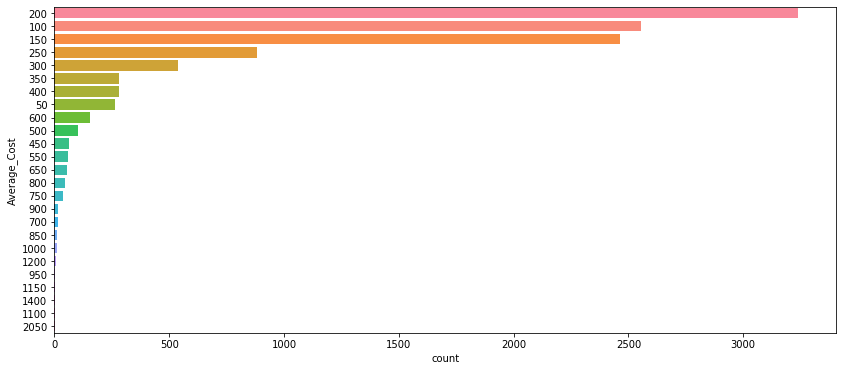

In [76]:
#Average_Cost influence
plt.figure(figsize=(14,6))

sns.countplot(y = df_train.Average_Cost, order=df_train.Average_Cost.value_counts().index, saturation=3)

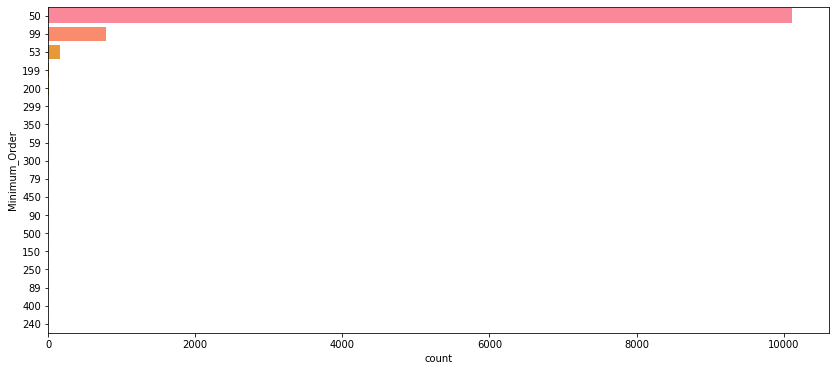

In [77]:
#Minimum_Order data
plt.figure(figsize=(14,6))

sns.countplot(y = df_train.Minimum_Order, order=df_train.Minimum_Order.value_counts().index, saturation=3)

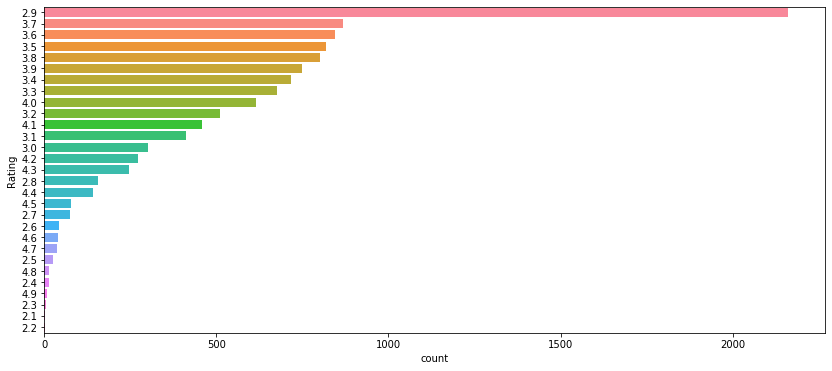

In [78]:
#Rating info
plt.figure(figsize=(14,6))
sns.countplot(y = df_train.Rating, order=df_train.Rating.value_counts().index, saturation=3)

In [64]:
df_train.keys()

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

In [ ]:
# df_train[['Votes', 'Reviews']] = df_train[['Votes', 'Reviews']].astype(np.int64)

# df_to_predict[['Votes', 'Reviews']] = df_to_predict[['Votes', 'Reviews']].astype(np.int64)

In [ ]:
# df_train.Rating = df_train.Rating.astype(np.float64)

# df_to_predict.Rating = df_to_predict.Rating.astype(np.float64)

In [ ]:
#lets work on object datatypes
#take a look on train Location column which are unique
df_train.Location.nunique()

In [ ]:
#unique points in Cuisines
df_train.Cuisines.nunique()

---
- whenever there is a need to use object variables in ML modesl we have to convert them into Algorithm understandable way

- so we are not using one-hot encodig due to curse of dimentionality 

- finally i'm using Label encoder to convert unique values
---

In [84]:
# Categorical boolean mask
#categorical_feature_mask = (df_train.dtypes==object)
# filter categorical columns using mask and turn it into a list
categorical_cols = df_train.columns[:3].tolist()
#df_train.columns[categorical_feature_mask].tolist()

In [85]:
categorical_cols

['Restaurant', 'Location', 'Cuisines']

In [86]:
# Categorical boolean mask
#categorical_feature_mask = (df_to_predict.dtypes==object)
# filter categorical columns using mask and turn it into a list
p_categorical_cols = df_to_predict.columns[:3].tolist()

In [87]:
p_categorical_cols

['Restaurant', 'Location', 'Cuisines']

In [88]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [89]:
# apply le on categorical feature columns
df_train[categorical_cols] = df_train[categorical_cols].apply(lambda col: le.fit_transform(col))
df_train[categorical_cols]

,Restaurant,Location,Cuisines
0,5086,10,995
1,1785,30,1116
2,571,19,1182
3,4708,28,1398
4,4896,26,388
...,...,...,...
11089,6772,0,2166
11090,3461,29,860
11091,2273,16,2036
11092,2970,30,1412


In [90]:
# apply le on categorical feature columns
df_to_predict[p_categorical_cols] = df_to_predict[p_categorical_cols].apply(lambda col: le.fit_transform(col))
df_to_predict[p_categorical_cols]

,Restaurant,Location,Cuisines
0,580,17,586
1,1959,17,104
2,1123,28,326
3,1404,1,517
4,706,28,215
...,...,...,...
2769,1682,8,338
2770,2321,17,296
2771,1905,22,14
2772,453,4,37


In [91]:
df_train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,5086,10,995,200,50,3.5,12,4,30 minutes
1,1785,30,1116,100,50,3.5,11,4,30 minutes
2,571,19,1182,150,50,3.6,99,30,65 minutes
3,4708,28,1398,250,99,3.7,176,95,30 minutes
4,4896,26,388,200,99,3.2,521,235,65 minutes


In [92]:
df_to_predict.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,580,17,586,350,50,4.2,361,225
1,1959,17,104,100,50,2.9,0,87
2,1123,28,326,100,50,3.6,36,16
3,1404,1,517,200,50,3.6,66,33
4,706,28,215,150,50,2.9,38,14


In [93]:
df_train[['Restaurant', 'Location', 'Cuisines']] = df_train[['Restaurant', 'Location', 'Cuisines']].astype(np.int64)

In [94]:
df_to_predict[['Restaurant', 'Location', 'Cuisines']] = df_to_predict[['Restaurant', 'Location', 'Cuisines']].astype(np.int64)

In [95]:
df_train.describe()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
count,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000
mean,3736.588840,16.911386,1137.762192,202.708916,54.099703,3.487271,236.033354,117.779681
std,2163.358187,9.631911,611.805042,129.839111,17.409059,0.464138,500.857756,285.830424
min,0.000000,0.000000,0.000000,50.000000,50.000000,2.100000,3.000000,1.000000
25%,1856.000000,8.000000,615.000000,100.000000,50.000000,3.000000,26.000000,11.000000
50%,3726.000000,17.000000,1257.000000,200.000000,50.000000,3.500000,106.000000,48.000000
75%,5626.000000,27.000000,1590.000000,200.000000,50.000000,3.800000,199.000000,97.000000
max,7479.000000,34.000000,2178.000000,2050.000000,500.000000,4.900000,9054.000000,6504.000000


In [96]:
print("\nTrain set:\n\n",df_train.dtypes, "\n")

print("#"*75,"\n")

print("\nPrediction set:\n\n",df_to_predict.dtypes)


Train set:

 Restaurant         int64
Location           int64
Cuisines           int64
Average_Cost       int64
Minimum_Order      int64
Rating           float64
Votes              int64
Reviews            int64
Delivery_Time     object
dtype: object 

########################################################################### 


Prediction set:

 Restaurant         int64
Location           int64
Cuisines           int64
Average_Cost       int64
Minimum_Order      int64
Rating           float64
Votes              int64
Reviews            int64
dtype: object


In [97]:
print("\nTrain set:\n\n",df_train.isnull().sum(), "\n")

print("#"*75,"\n")

print("\nPrediction set:\n\n",df_to_predict.isnull().sum())


Train set:

 Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64 

########################################################################### 


Prediction set:

 Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
dtype: int64


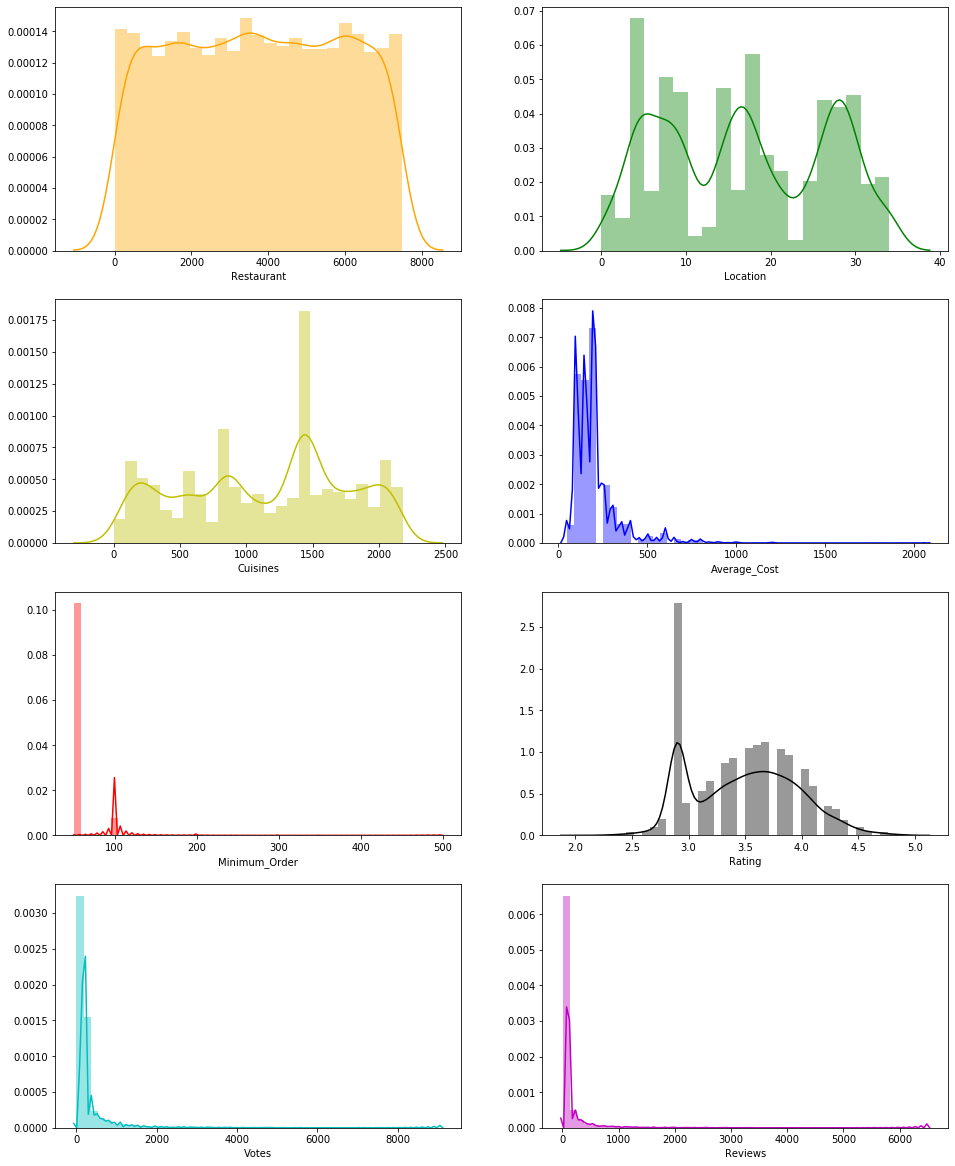

In [107]:
# Let us check the distribution graphs for our data
plt.figure(figsize=(16,26))
c = ['r','Orange','g','y','b','r','k','c','m']
for i in np.arange(1,9):
    plt.subplot(5,2,i)
    sns.distplot(df_train[df_train.columns[i-1]], color=c[i])

# Data Insights

(8.0, 0.0)

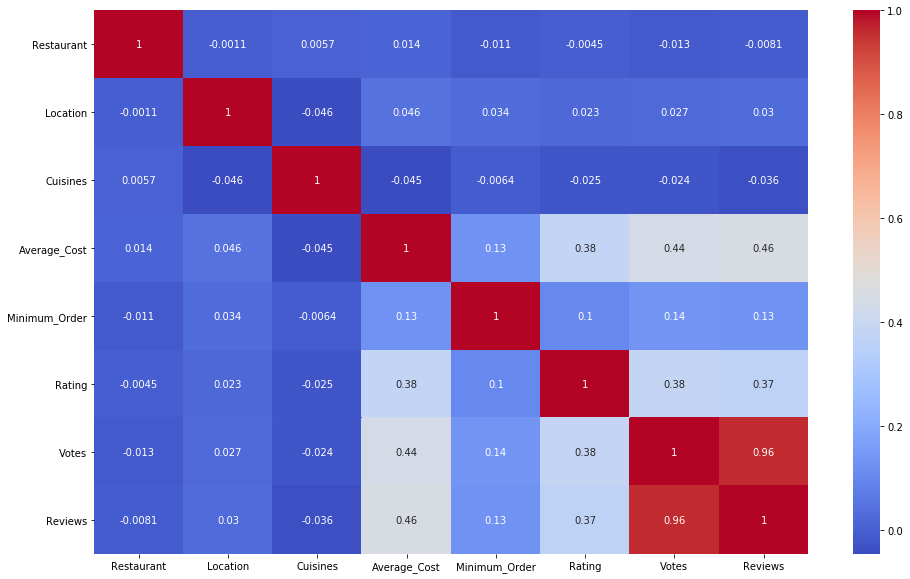

In [109]:
# Correlation between the data columns in training data
plt.figure(figsize=(16,10))
ax = sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

- We can see that Reviews is highly related with
    - Votes
    - Average_cost

In [111]:
Submission_data = pd.read_excel("Sample_Submission.xlsx")
Submission_data

,Delivery_Time
0,120 minutes
1,20 minutes
2,20 minutes
3,65 minutes
4,45 minutes
...,...
2769,80 minutes
2770,65 minutes
2771,120 minutes
2772,120 minutes


In [112]:
Submission_data.Delivery_Time.unique()

array(['120 minutes', '20 minutes', '65 minutes', '45 minutes',
       '30 minutes', '80 minutes', '10 minutes'], dtype=object)

In [113]:
df_train.Delivery_Time.unique()

array(['30 minutes', '65 minutes', '45 minutes', '10 minutes',
       '20 minutes', '120 minutes', '80 minutes'], dtype=object)

In [ ]:
# Since we need to send our final predictions made on test dataset in excel format
# the below function can be used to generate excel file for a given model which can then be submitted
# to the hackathon
# def generateFinalPredictionFile(model):
#     y_test_pred = model.predict(X_to_predict.values)
#     y_test_pred_exp = np.exp(y_test_pred)
#     print(y_test_pred_exp)
#     pd.DataFrame(y_test_pred_exp, columns = ['Price']).to_excel("Final_Pred.xlsx", index = False)

## Standardizing the Train Dataset

In [114]:
cols = list(df_train.columns)
cols

['Restaurant',
 'Location',
 'Cuisines',
 'Average_Cost',
 'Minimum_Order',
 'Rating',
 'Votes',
 'Reviews',
 'Delivery_Time']

In [115]:
df_train[cols[:-1]].keys()

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews'],
      dtype='object')

In [116]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [117]:
df_train[cols[:-1]] = ss.fit_transform(df_train[cols[:-1]])

In [118]:
df_train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,0.623786,-0.717583,-0.233356,-0.020865,-0.235503,0.027426,-0.447320,-0.398085,30 minutes
1,-0.902151,1.358942,-0.035572,-0.791083,-0.235503,0.027426,-0.449316,-0.398085,30 minutes
2,-1.463341,0.216853,0.072310,-0.405974,-0.235503,0.242889,-0.273610,-0.307118,65 minutes
3,0.449050,1.151289,0.425380,0.364245,2.579250,0.458352,-0.119866,-0.079700,30 minutes
4,0.535955,0.943637,-1.225547,-0.020865,2.579250,-0.618963,0.568983,0.410123,65 minutes


In [119]:
col = list(df_to_predict.columns)

In [120]:
col

['Restaurant',
 'Location',
 'Cuisines',
 'Average_Cost',
 'Minimum_Order',
 'Rating',
 'Votes',
 'Reviews']

In [121]:
df_to_predict[col] = ss.fit_transform(df_to_predict[col])

In [122]:
df_to_predict.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,-0.897152,0.010057,0.546261,1.350471,-0.218065,1.586561,0.371149,0.457730
1,1.093993,0.010057,-1.433459,-0.833142,-0.218065,-1.246965,-0.379843,-0.073943
2,-0.113111,1.155165,-0.521638,-0.833142,-0.218065,0.278780,-0.304952,-0.347485
3,0.292626,-1.655553,0.262857,0.040303,-0.218065,0.278780,-0.242543,-0.281989
4,-0.715220,1.155165,-0.977548,-0.396419,-0.218065,-1.246965,-0.300792,-0.355190


In [123]:
# from sklearn.model_selection import train_test_split

# #train, val = train_test_split(train_sample, test_size = 0.1, random_state = 123)
# train, val = train_test_split(df_train, test_size = 0.1, random_state = 123)

# #X_train = train[cols[:-1]]
# X_train = df_train[cols[:-1]] 

# #Y_train = train[cols[-1]]
# Y_train = df_train[cols[-1]] 


# X_Val = val[cols[:-1]]
# Y_Val = val[cols[-1]]

# #X_test = test_sample[cols[:-1]]
# X_test = df_to_predict

# #Create train and test data set
# #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

## Split the Data

In [124]:
#Except the targeted RESPONSE variables we are taking all the variables as inputs 
X = df_train.drop('Delivery_Time', axis=1)

X.shape

(11093, 8)

In [125]:
#Use RESPONSE as label
y = df_train['Delivery_Time']

y.shape

(11093,)

In [128]:
from sklearn.model_selection import train_test_split

#Create train and test data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=29)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7765, 8) (3328, 8) (7765,) (3328,)


In [129]:
# from xgboost import XGBClassifier

# xgb = XGBClassifier()

# xgb.fit(X_train,y_train)

# xgb.score(X_test,y_test)

# Predictions = xgb.predict(df_to_predict)


In [ ]:
# xgb.score(X_test,y_test)

In [ ]:
# #X_test = df_to_predict[col[3:]].values
# X_test = df_to_predict#.drop('Delivery_Time', axis=1)
# X_test

In [ ]:
#Predictions = xgb.predict(df_to_predict)

In [ ]:
#pd.DataFrame(Predictions).to_csv("sub.csv")

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.model_selection import cross_val_score

# rf = RandomForestClassifier(n_estimators=100)

# Sfold = StratifiedShuffleSplit(n_splits=12, random_state=42)

# # kfold = StratifiedKFold(n_splits=100, shuffle=True, random_state=42)
# # shufflesplit = StratifiedShuffleSplit(n_splits=100, random_state=42, test_size=2)

# cv = cross_val_score(rf, X, y, cv=Sfold, scoring='accuracy')
# cv

In [ ]:
# cv.mean()

LR: 0.691517 (0.005522)
LDA: 0.683934 (0.007930)
KNN: 0.696697 (0.007266)
NB: 0.123198 (0.011497)
SVM: 0.706231 (0.007332)
CART: 0.728529 (0.012167)
RC: 0.802703 (0.008491)
XGB: 0.724550 (0.008323)


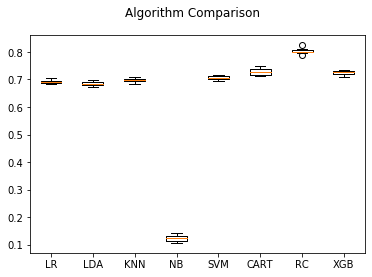

In [130]:
# Compare Algorithms

#from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# prepare configuration for cross validation test harness
seed = 42


# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RC', RandomForestClassifier(n_estimators=100)))
models.append(('XGB', XGBClassifier()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    Sfold = StratifiedShuffleSplit(n_splits=12, random_state=seed)
    cv_results = cross_val_score(model, X, y, cv=Sfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Thank You